# Video Engagement Prediction

**Objective.** Predict engagement outcomes for educational videos using metadata and transcript-derived features.

**Pipeline.** Missing value handling, feature engineering (lexical complexity, stopword density, speaking intensity), model comparison, and stacking.

**Evaluation.** ROC-AUC, PR-AUC, and F1 under class imbalance.

**Project Status.** Metrics are reported from prior runs in the CV; rerun to reproduce.


In [1]:
import pandas as pd
import numpy as np

data_path = "/Users/maguotong/Desktop/COMP0186FoundofAI/COMP0186_CW1/data/lectures_dataset.csv"
lectures = pd.read_csv(data_path)

In [2]:
lectures.head(10)

,auxiliary_rate,conjugate_rate,normalization_rate,tobe_verb_rate,preposition_rate,pronoun_rate,document_entropy,easiness,fraction_stopword_coverage,fraction_stopword_presence,...,title_word_count,word_count,most_covered_topic,topic_coverage,duration,lecture_type,has_parts,speaker_speed,silent_period_rate,median_engagement
0,0.013323,0.033309,0.034049,0.035159,0.121392,0.089563,7.753995,75.583936,0.428135,0.553664,...,9,2668,http://en.wikipedia.org/wiki/Kernel_density_es...,0.414578,890,vl,False,2.997753,0.000000,0.502923
1,0.014363,0.030668,0.018763,0.036749,0.095885,0.103002,8.305269,86.870523,0.602446,0.584498,...,6,7512,http://en.wikipedia.org/wiki/Interest_rate,0.292437,2850,vl,False,2.635789,0.000000,0.011989
2,0.019028,0.033242,0.030720,0.037827,0.118294,0.124255,7.965583,81.915968,0.525994,0.605685,...,3,4264,http://en.wikipedia.org/wiki/Normal_distribution,0.271424,1680,vit,False,2.538095,0.000000,0.041627
3,0.023416,0.042700,0.016873,0.046832,0.122590,0.104339,8.142877,80.148937,0.504587,0.593664,...,9,2869,http://en.wikipedia.org/wiki/Matrix_(mathematics),0.308092,1270,vl,False,2.259055,0.000000,0.064989
4,0.021173,0.041531,0.023412,0.038884,0.130700,0.102606,8.161250,76.907549,0.559633,0.581637,...,9,4840,http://en.wikipedia.org/wiki/Transport,0.414219,2000,vkn,False,2.420000,0.000000,0.052154
5,0.017616,0.036921,0.023649,0.043195,0.137307,0.098938,8.182952,76.684133,0.522936,0.575290,...,10,4108,http://en.wikipedia.org/wiki/Time,0.338298,1830,vl,False,2.244809,0.000000,0.256300
6,0.011080,0.039036,0.018423,0.042257,0.111698,0.112342,8.101635,85.303173,0.596330,0.600232,...,10,7523,http://en.wikipedia.org/wiki/Phase_diagram,0.438675,3060,vl,False,2.458497,0.196126,0.032233
7,0.026247,0.038064,0.008956,0.038313,0.098644,0.163951,7.733064,97.572190,0.584098,0.687275,...,9,7790,http://en.wikipedia.org/wiki/Rank_(linear_alge...,0.212774,3910,vl,False,1.992327,0.289208,0.015063
8,0.021587,0.033706,0.018557,0.041091,0.099792,0.123840,8.219794,87.008975,0.541284,0.600454,...,7,5112,http://en.wikipedia.org/wiki/Machine_learning,0.298585,2980,vl,False,1.715436,0.000000,0.025882
9,0.023666,0.052065,0.018933,0.027539,0.131239,0.108434,7.714182,88.650478,0.437309,0.617900,...,10,2299,http://en.wikipedia.org/wiki/Photon,0.300573,1040,vl,False,2.210577,0.000000,0.031795


In [3]:
print(lectures.columns)

Index(['auxiliary_rate', 'conjugate_rate', 'normalization_rate',
       'tobe_verb_rate', 'preposition_rate', 'pronoun_rate',
       'document_entropy', 'easiness', 'fraction_stopword_coverage',
       'fraction_stopword_presence', 'subject_domain', 'freshness',
       'title_word_count', 'word_count', 'most_covered_topic',
       'topic_coverage', 'duration', 'lecture_type', 'has_parts',
       'speaker_speed', 'silent_period_rate', 'median_engagement'],
      dtype='object')


#### Analysis 1 Univariate

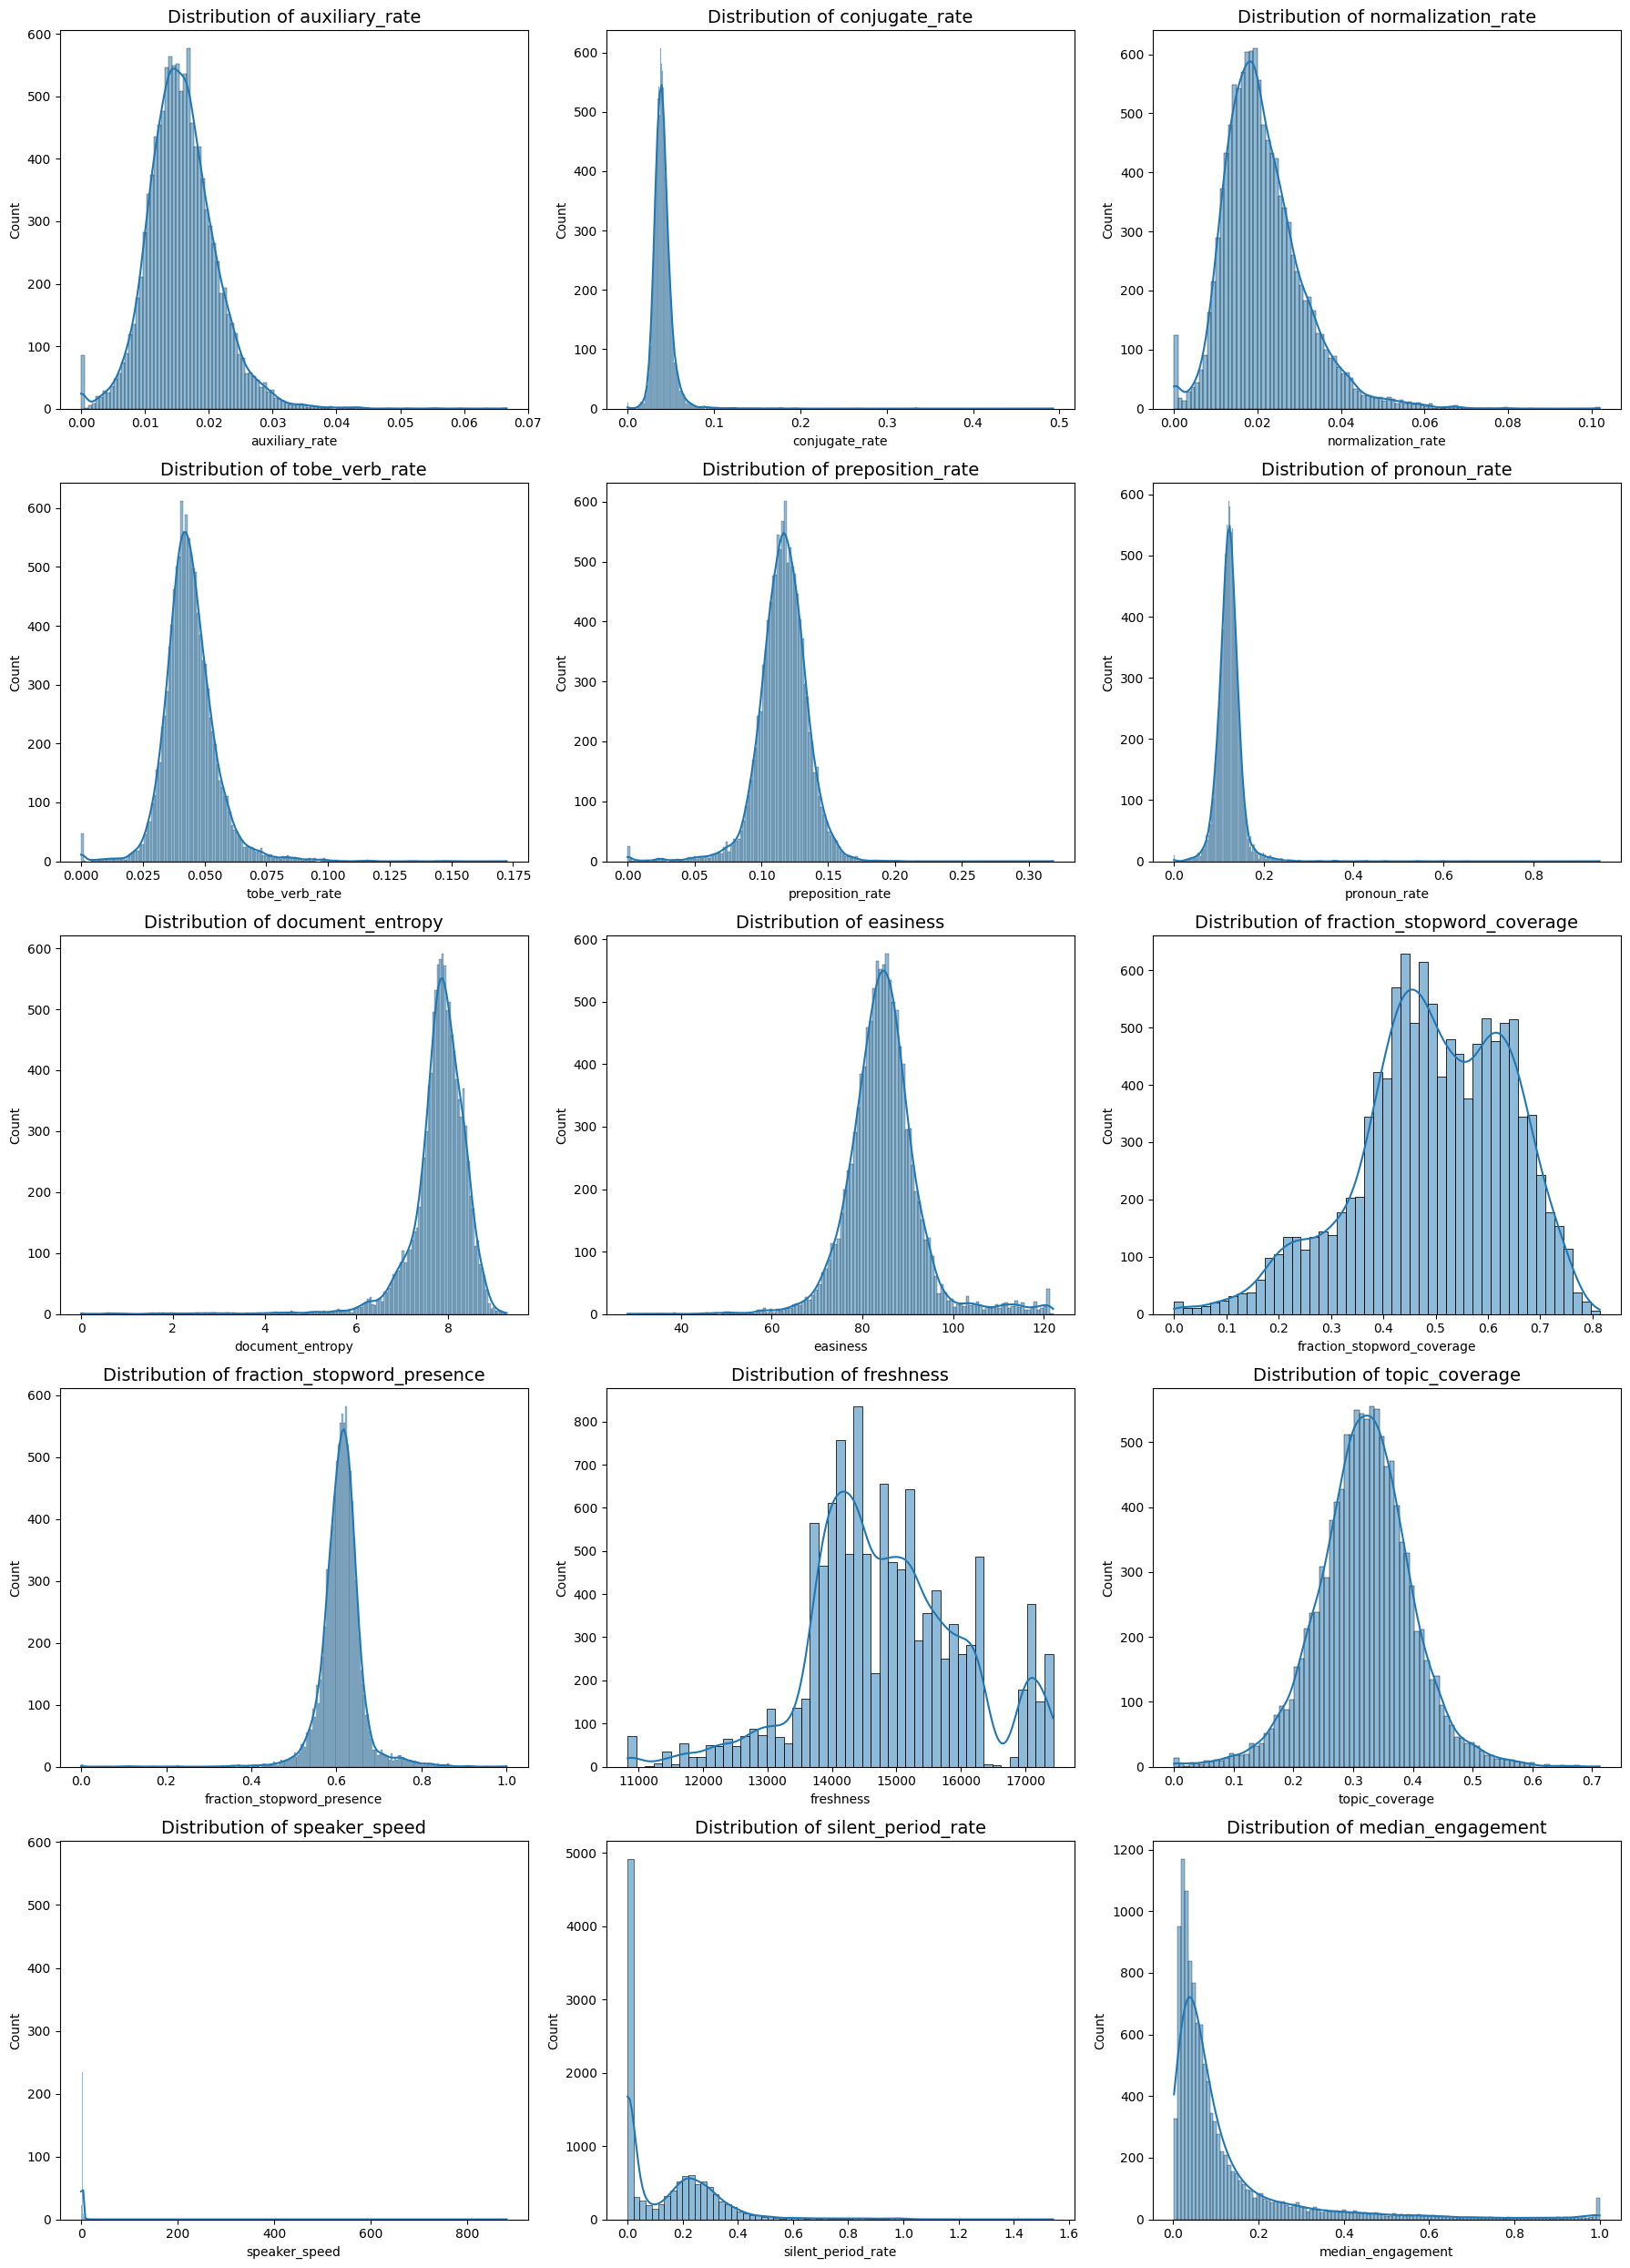

In [4]:
# Your Code Here
import matplotlib.pyplot as plt
import seaborn as sns
import math
# Continuous 
continuous = [
    'auxiliary_rate','conjugate_rate','normalization_rate','tobe_verb_rate',
    'preposition_rate','pronoun_rate','document_entropy','easiness',
    'fraction_stopword_coverage','fraction_stopword_presence','freshness',
    'topic_coverage','speaker_speed','silent_period_rate','median_engagement'
]

# plot continuous
cols = 3
rows = math.ceil(len(continuous) / cols)

plt.figure(figsize=(18, 5 * rows))  

for i, col in enumerate(continuous, 1):
    plt.subplot(rows, cols, i)
    sns.histplot(lectures[col], kde=True)
    plt.title(f"Distribution of {col}", fontsize=14)
    plt.xlabel(col)
    plt.ylabel("Count")

plt.tight_layout()
plt.show()

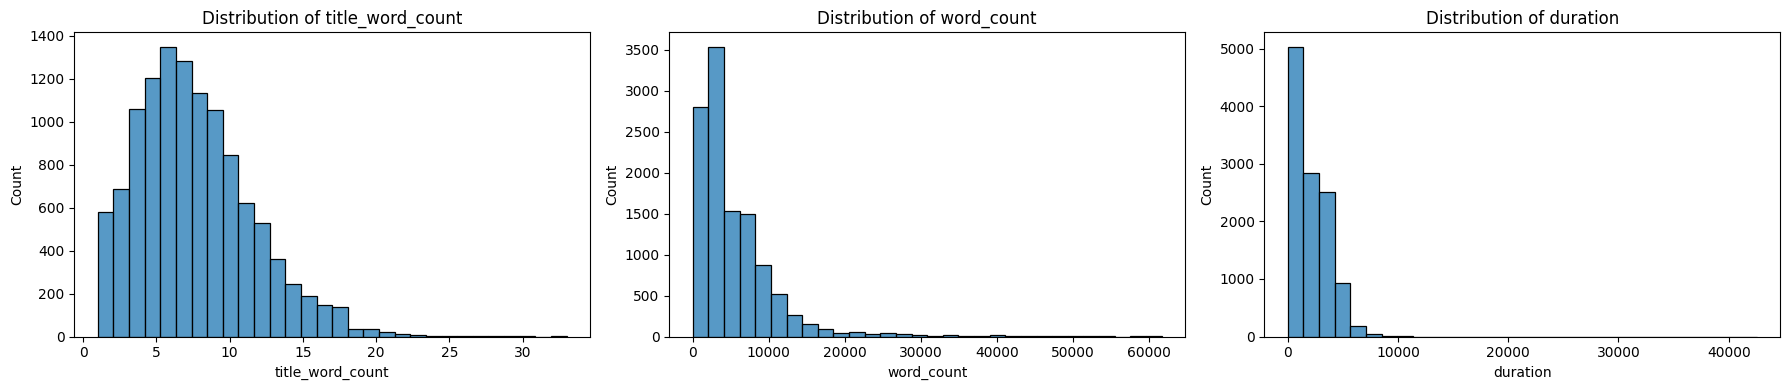

In [5]:
# Discrete
discrete = ['title_word_count', 'word_count', 'duration']

# plot discrete
cols = 3
rows = math.ceil(len(discrete) / cols)

plt.figure(figsize=(6 * cols, 4 * rows))
for i, col in enumerate(discrete, 1):
    plt.subplot(rows, cols, i)
    sns.histplot(lectures[col], bins=30)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")

plt.tight_layout()
plt.show()

For numerical type variables, I choose to draw a scatter plot to further observe the strength of the relationship between features and labels.

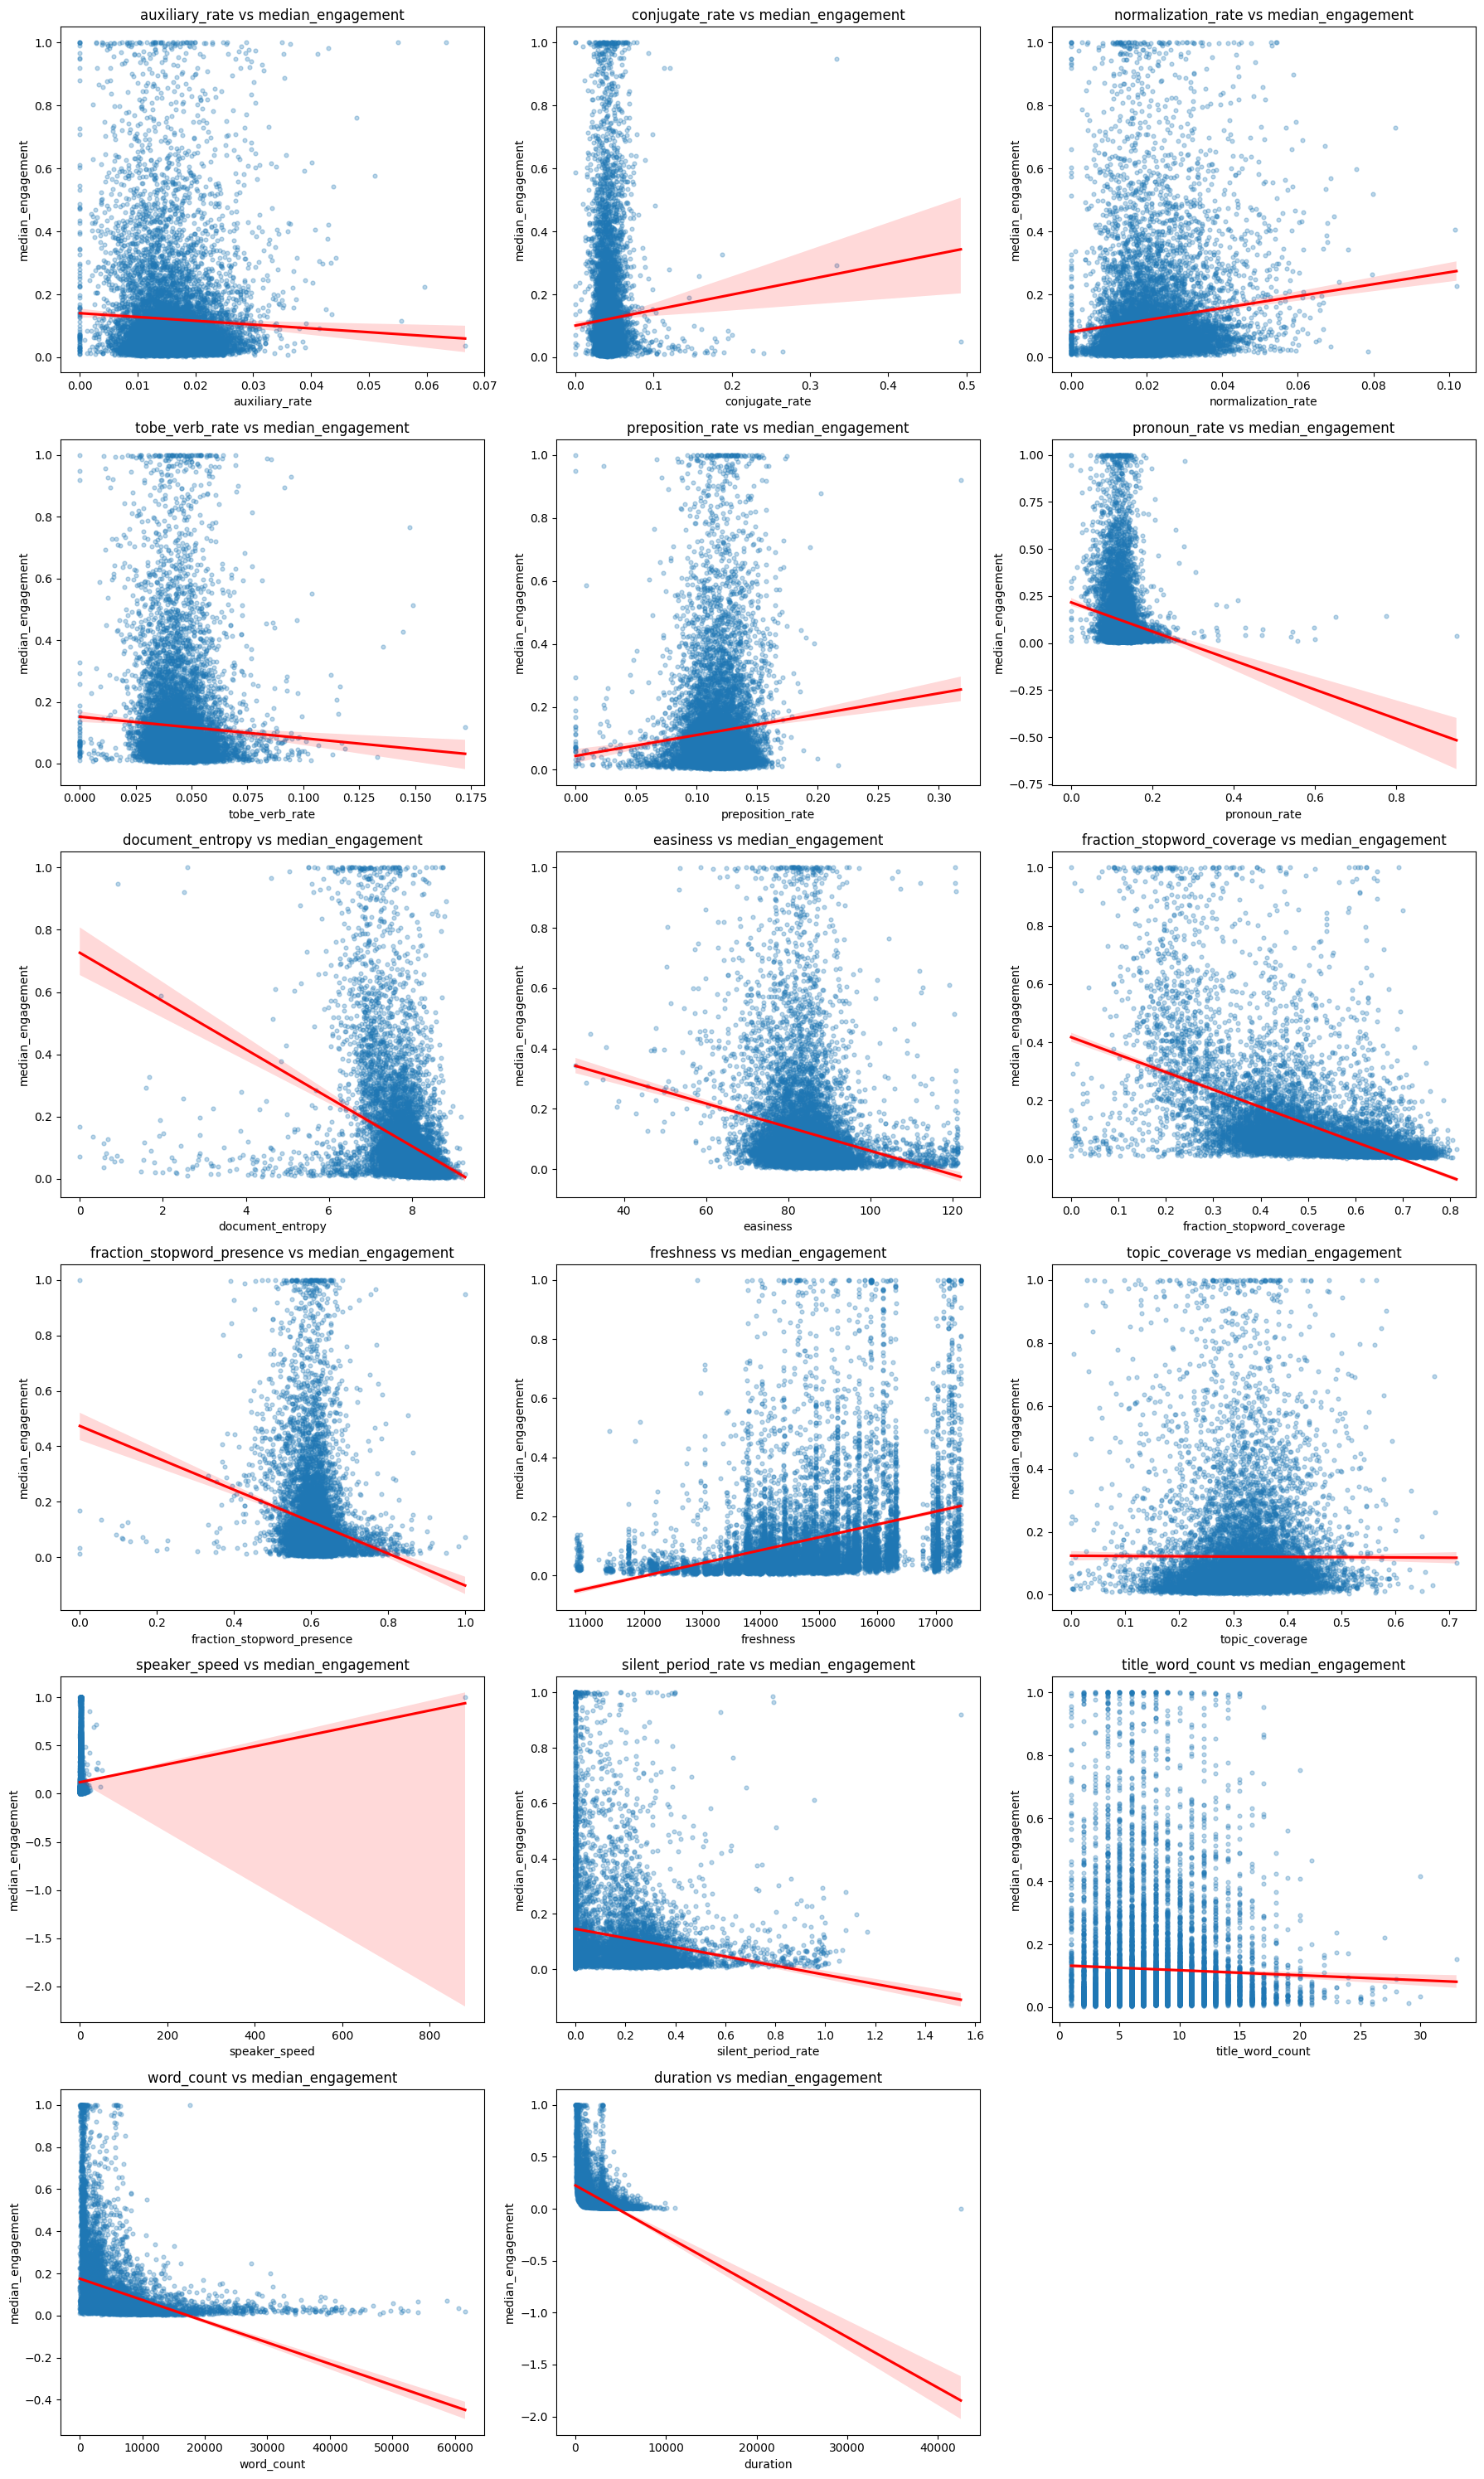

In [6]:
# scatter plot
numeric_cols = continuous + discrete

if "median_engagement" in numeric_cols:
    numeric_cols.remove("median_engagement")

plt.figure(figsize=(18, 5 * ((len(numeric_cols) + 2) // 3)))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot((len(numeric_cols) + 2) // 3, 3, i)
    sns.regplot(
        data=lectures,
        x=col,
        y="median_engagement",
        scatter_kws={"alpha": 0.3, "s": 12},
        line_kws={"color": "red"}
    )
    plt.title(f"{col} vs median_engagement")

plt.tight_layout()
plt.show()

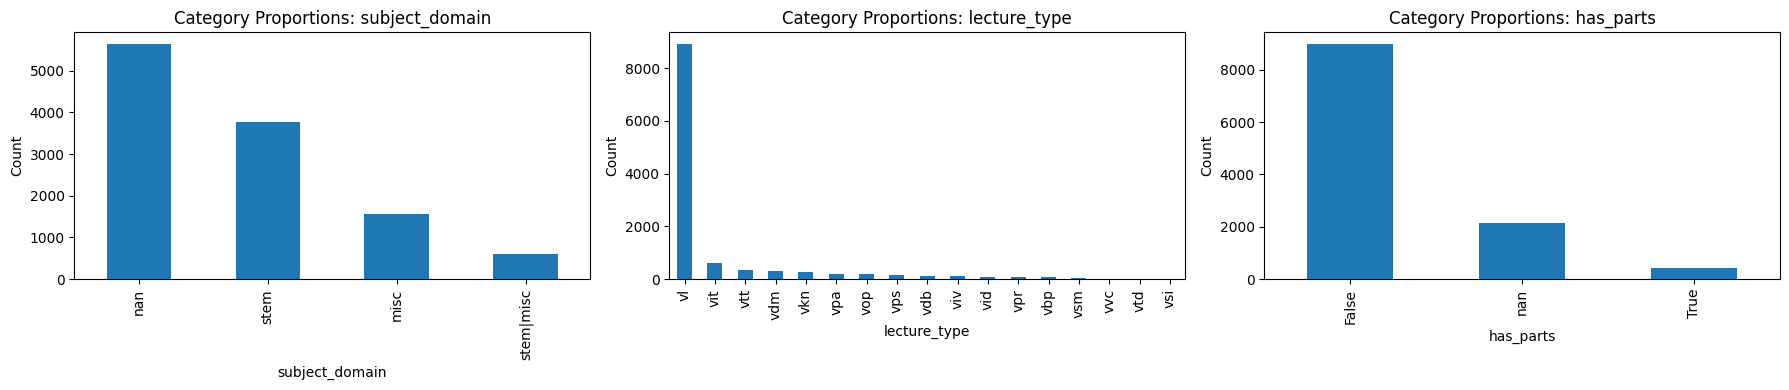

In [7]:
# low categories
categorical_low = ['subject_domain', 'lecture_type', 'has_parts']

cols = 3
rows = math.ceil(len(categorical_low) / cols)
# Bar Chart
plt.figure(figsize=(6 * cols, 4 * rows))

for i, col in enumerate(categorical_low, 1):
    plt.subplot(rows, cols, i)
    lectures[col].value_counts(dropna=False).plot(kind='bar')
    plt.title(f"Category Proportions: {col}")
    plt.xlabel(col)
    plt.ylabel("Count")

plt.tight_layout()
plt.show()

For the classification of this url, due to the large number of categories, it is considered to be deleted directly.

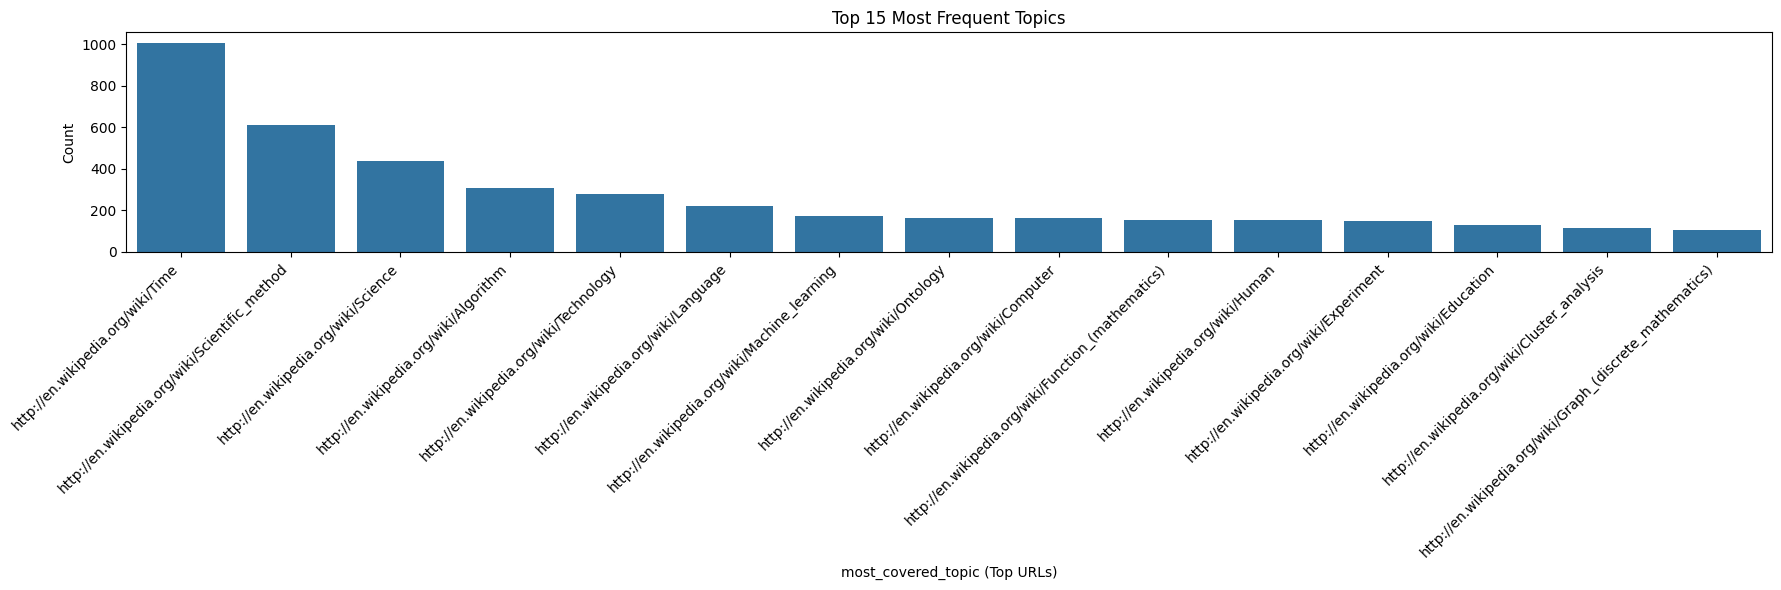

In [8]:
# High categories
top_n = 15  

topic_counts = lectures['most_covered_topic'].value_counts().head(top_n)

plt.figure(figsize=(18, 6)) 
sns.barplot(x=topic_counts.index, y=topic_counts.values)
plt.title(f"Top {top_n} Most Frequent Topics")
plt.xlabel("most_covered_topic (Top URLs)")
plt.ylabel("Count")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

I used boxplots to analyse the relationship between categorical variables and the engagement label.It can also show outliers.

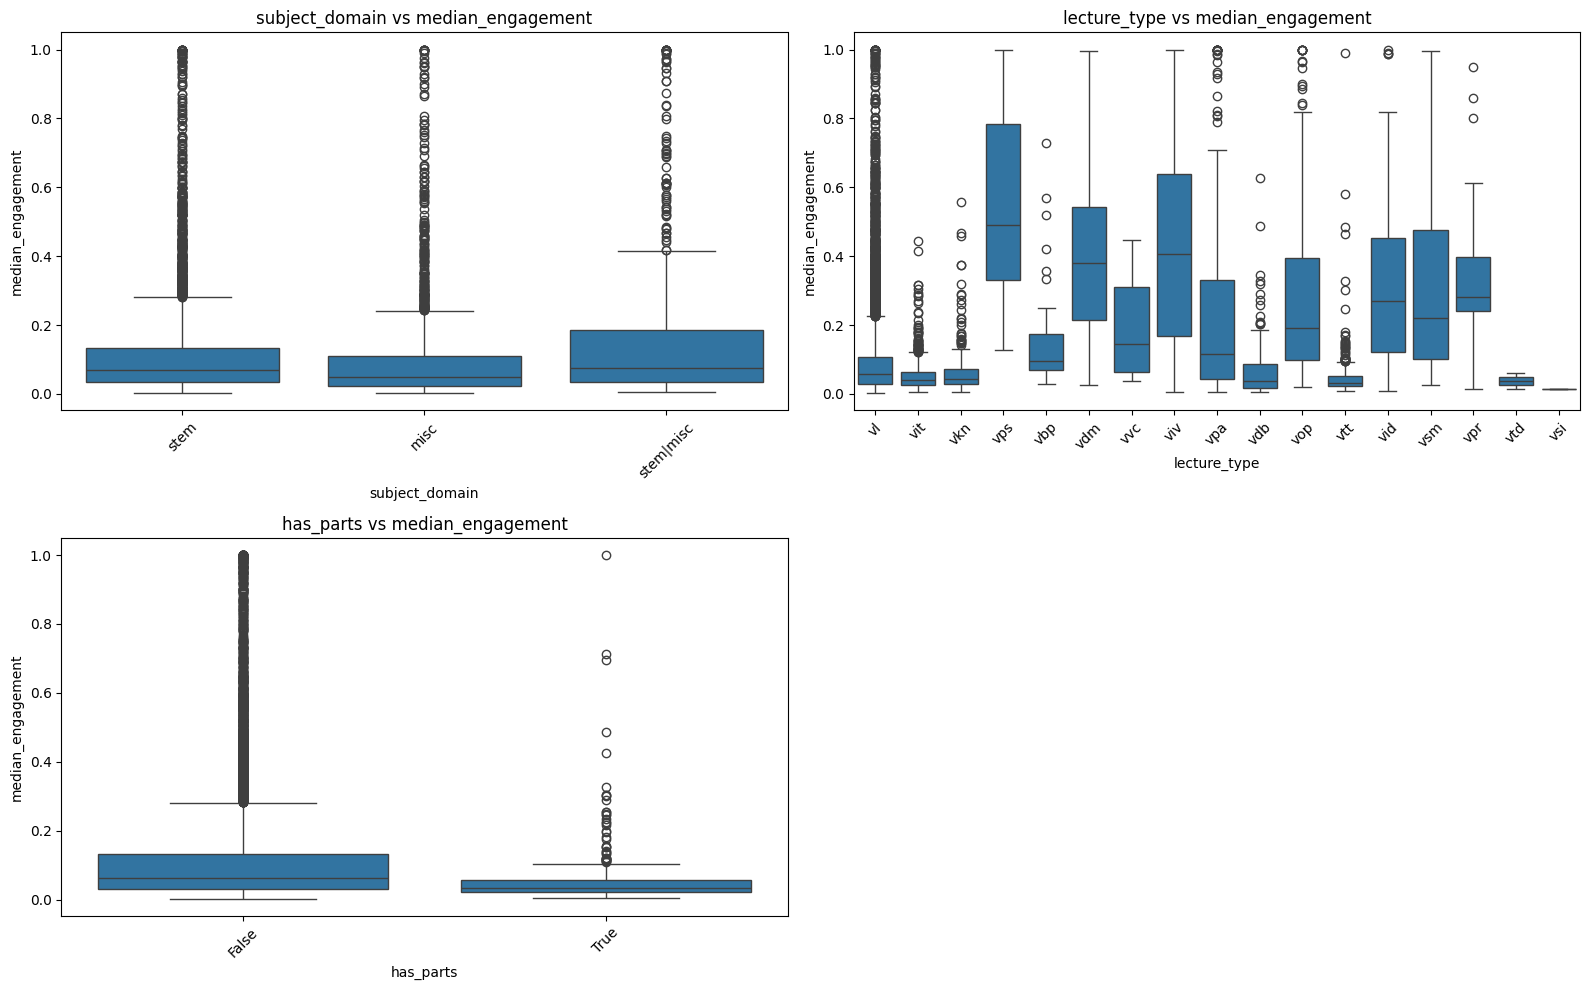

In [9]:
categorical_cols = categorical_low
plt.figure(figsize=(16, 5 * ((len(categorical_cols) + 1) // 2)))

for i, col in enumerate(categorical_cols, 1):
    plt.subplot((len(categorical_cols) + 1) // 2, 2, i)
    sns.boxplot(data=lectures, x=col, y="median_engagement")
    plt.title(f"{col} vs median_engagement")
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

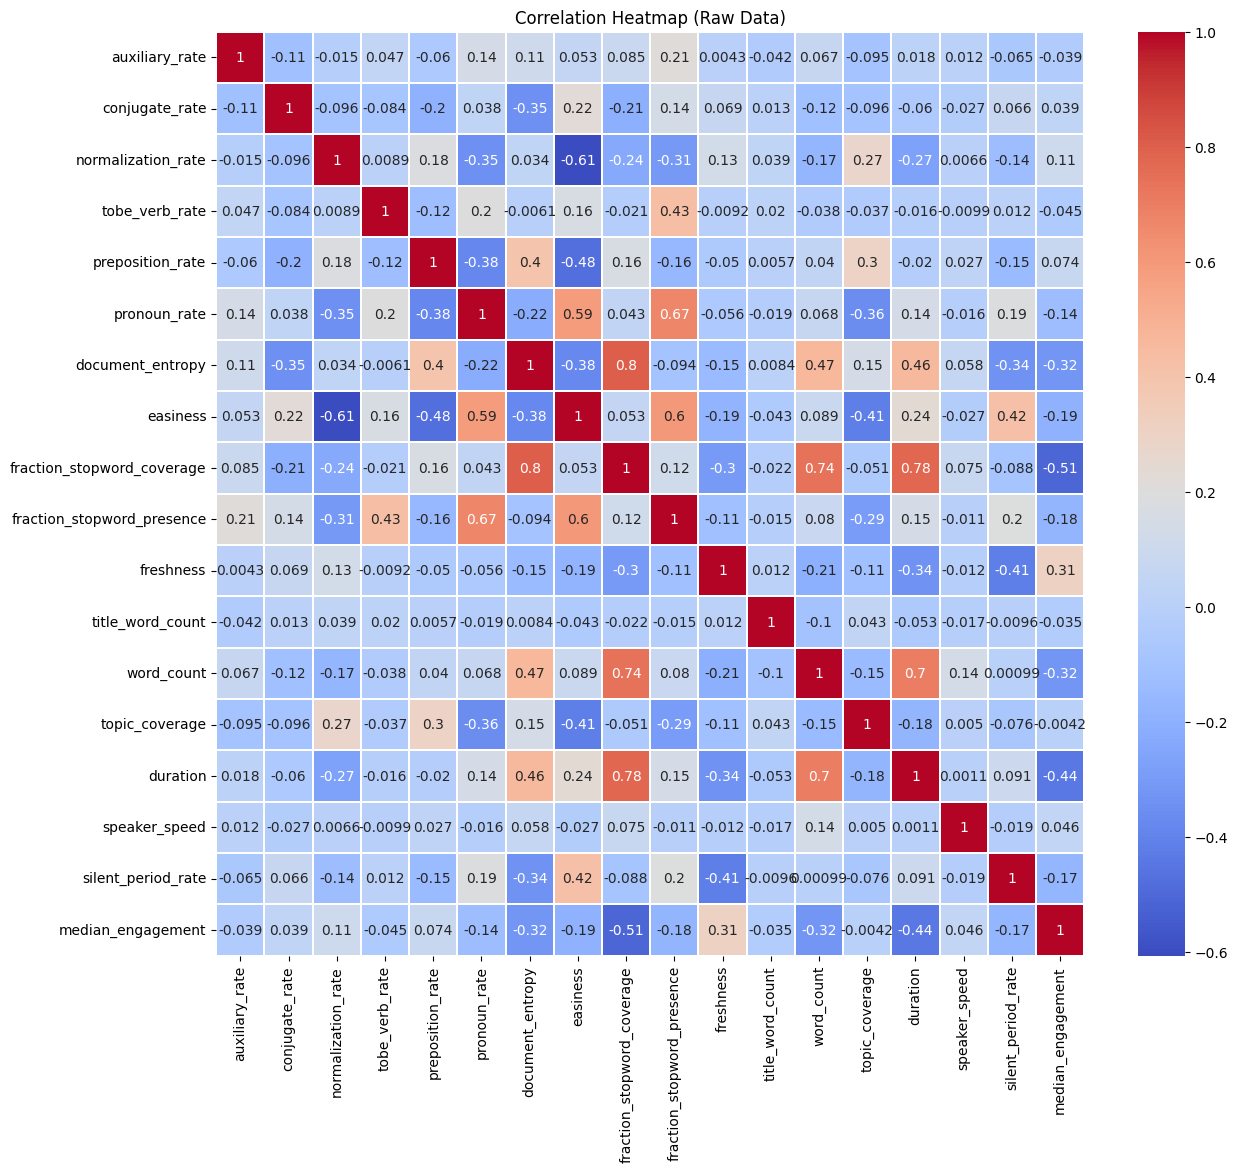

In [10]:
#heatmap
numeric_lectures = lectures.select_dtypes(include=['float64', 'int64'])

corr = numeric_lectures.corr()

plt.figure(figsize=(14, 12))
sns.heatmap(corr, annot= True, cmap='coolwarm', linewidths=0.3)
plt.title("Correlation Heatmap (Raw Data)")
plt.show()

#### Analysis 2 

In [11]:
# The number of missing values
missing_count = lectures.isnull().sum().sort_values(ascending=False)

# The percentage of missing value
missing_ratio = (lectures.isnull().mean() * 100).sort_values(ascending=False)

print("Missing Value Count:")
print(missing_count)

print("\nMissing Value Percentage (%):")
print(missing_ratio)

Missing Value Count:
subject_domain                5635
has_parts                     2152
auxiliary_rate                   0
title_word_count                 0
silent_period_rate               0
speaker_speed                    0
lecture_type                     0
duration                         0
topic_coverage                   0
most_covered_topic               0
word_count                       0
freshness                        0
conjugate_rate                   0
fraction_stopword_presence       0
fraction_stopword_coverage       0
easiness                         0
document_entropy                 0
pronoun_rate                     0
preposition_rate                 0
tobe_verb_rate                   0
normalization_rate               0
median_engagement                0
dtype: int64

Missing Value Percentage (%):
subject_domain                48.796328
has_parts                     18.635262
auxiliary_rate                 0.000000
title_word_count               0.000000
silen

In [12]:
#Outlier detection
import numpy as np

numeric_features = list(set(continuous + discrete))  

outlier_info = {}

for col in numeric_features:
    if col in lectures.columns:
        Q1 = lectures[col].quantile(0.25)
        Q3 = lectures[col].quantile(0.75)
        IQR = Q3 - Q1

        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR

        outlier_count = ((lectures[col] < lower) | (lectures[col] > upper)).sum()
        outlier_ratio = outlier_count / len(lectures)

        outlier_info[col] = [outlier_count, outlier_ratio]

outlier_df = pd.DataFrame(outlier_info, index=['Outlier Count', 'Outlier Ratio']).T

outlier_df = outlier_df.sort_values(by='Outlier Ratio', ascending=False)

print(outlier_df)

                            Outlier Count  Outlier Ratio
median_engagement                  1306.0       0.113093
speaker_speed                       921.0       0.079754
fraction_stopword_presence          699.0       0.060530
easiness                            636.0       0.055074
document_entropy                    545.0       0.047194
word_count                          513.0       0.044423
pronoun_rate                        511.0       0.044250
tobe_verb_rate                      479.0       0.041479
conjugate_rate                      474.0       0.041046
preposition_rate                    356.0       0.030828
auxiliary_rate                      334.0       0.028923
normalization_rate                  312.0       0.027018
topic_coverage                      309.0       0.026758
silent_period_rate                  225.0       0.019484
title_word_count                    189.0       0.016366
freshness                           174.0       0.015068
duration                       

In [13]:
from sklearn.preprocessing import StandardScaler
def preprocess_lecture_dataset(dataset):
    
    df = dataset.copy()

 
    # Missing Value Handling
 
    df["subject_domain"] = df["subject_domain"].fillna("Unknown")
    df["has_parts"] = df["has_parts"].fillna("Unknown").astype(str)

    # Drop high-cardinality feature
    
    if "most_covered_topic" in df.columns:
        df = df.drop(columns=["most_covered_topic"])
    
    # Re-engineer freshness

    df["freshness_years"] = df["freshness"] / 365
    df["is_recent"] = (df["freshness_years"] < 1).astype(int)
    df["freshness_bin"] = pd.qcut(df["freshness_years"], q=4, labels=False, duplicates="drop")
    df = df.drop(columns=["freshness"])

    # Outlier Clipping
   
    df["speaker_speed"] = df["speaker_speed"].clip(50, 250)

    # light clipping for ratio features
    ratio_features = [
        "auxiliary_rate","conjugate_rate","normalization_rate","tobe_verb_rate",
        "preposition_rate","pronoun_rate","fraction_stopword_presence",
        "fraction_stopword_coverage","topic_coverage","document_entropy","easiness"
    ]

    for col in ratio_features:
        if col in df.columns:
            low = df[col].quantile(0.01)
            high = df[col].quantile(0.99)
            df[col] = df[col].clip(low, high)

    # Transform Long-tail Variables
    
    df["word_count_log"] = np.log1p(df["word_count"])
    df["duration_log"] = np.log1p(df["duration"])
    df = df.drop(columns=["word_count", "duration"])

    # Binning silent_period_rate (safe version)
    
    bins = pd.qcut(df["silent_period_rate"], q=4, retbins=True, duplicates="drop")[1]

    labels = [f"silent_bin_{i}" for i in range(len(bins) - 1)]
    df["silent_period_bin"] = pd.cut(
        df["silent_period_rate"],
        bins=bins,
        labels=labels,
        include_lowest=True
    )

    df = df.drop(columns=["silent_period_rate"])

    # One-hot encode categorical variables

    categorical_cols = ["lecture_type", "subject_domain", "has_parts", "silent_period_bin"]
    df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

    # Logit transform the label

    eps = 1e-6
    df["median_engagement_logit"] = np.log(
        (df["median_engagement"] + eps) / (1 - df["median_engagement"] + eps)
    )

    df = df.drop(columns=["median_engagement"])

    # Standardize numeric features
 
    numeric_cols = df.select_dtypes(include=["float64", "int64"]).columns.tolist()

    if "median_engagement_logit" in numeric_cols:
        numeric_cols.remove("median_engagement_logit")

    scaler = StandardScaler()
    df[numeric_cols] = scaler.fit_transform(df[numeric_cols])
    
    # Final Result
    preprocessed_dataset = df.copy()
    return preprocessed_dataset


In [14]:
preprocessed_lectures = preprocess_lecture_dataset(lectures)

In [15]:
preprocessed_lectures.head()

,auxiliary_rate,conjugate_rate,normalization_rate,tobe_verb_rate,preposition_rate,pronoun_rate,document_entropy,easiness,fraction_stopword_coverage,fraction_stopword_presence,...,lecture_type_vtt,lecture_type_vvc,subject_domain_misc,subject_domain_stem,subject_domain_stem|misc,has_parts_True,has_parts_Unknown,silent_period_bin_silent_bin_1,silent_period_bin_silent_bin_2,median_engagement_logit
0,-0.473589,-0.766694,1.371950,-0.918317,0.298655,-1.416947,-0.094236,-1.162942,-0.469391,-1.334949,...,False,False,False,True,False,False,False,False,False,0.011694
1,-0.272948,-1.048049,-0.273098,-0.754942,-1.186788,-0.839789,0.860973,0.265574,0.752762,-0.639371,...,False,False,False,False,False,False,False,False,False,-4.411641
2,0.627064,-0.773835,1.013688,-0.644282,0.118280,0.072961,0.272389,-0.361512,0.216730,-0.161405,...,False,False,False,True,False,False,False,False,False,-3.136474
3,1.473706,0.233787,-0.476460,0.280824,0.368422,-0.782378,0.579592,-0.585161,0.066641,-0.432597,...,False,False,False,True,False,False,False,False,False,-2.666319
4,1.040866,0.109270,0.227233,-0.535627,0.840777,-0.856805,0.611428,-0.995415,0.452584,-0.703914,...,False,False,False,False,False,False,False,False,False,-2.899969


In [16]:
import numpy as np

def prepare_final_dataset(preprocessed_dataset):
    """
    takes the preprocessed lecture dataset and transforms it to the vector representation.

    Params:
        preprocessed_dataset (pandas.DataFrame): DataFrame object that contains the dataset
                                                after preprocessing

    Returns:
        X (pandas.DataFrame): DataFrame object that contains the features
        y (numpy.array): List/array of labels
    """

    df = preprocessed_dataset.copy()

    y = df["median_engagement_logit"].values

    X = df.drop(columns=["median_engagement_logit"]).copy()

    bool_cols = X.select_dtypes(include=["bool"]).columns
    X[bool_cols] = X[bool_cols].astype(int)

    return preprocessed_dataset, X, y

In [17]:
final_dataset, full_X, full_y = prepare_final_dataset(preprocessed_lectures)

In [18]:
full_X

,auxiliary_rate,conjugate_rate,normalization_rate,tobe_verb_rate,preposition_rate,pronoun_rate,document_entropy,easiness,fraction_stopword_coverage,fraction_stopword_presence,...,lecture_type_vtd,lecture_type_vtt,lecture_type_vvc,subject_domain_misc,subject_domain_stem,subject_domain_stem|misc,has_parts_True,has_parts_Unknown,silent_period_bin_silent_bin_1,silent_period_bin_silent_bin_2
0,-0.473589,-0.766694,1.371950,-0.918317,0.298655,-1.416947,-0.094236,-1.162942,-0.469391,-1.334949,...,0,0,0,0,1,0,0,0,0,0
1,-0.272948,-1.048049,-0.273098,-0.754942,-1.186788,-0.839789,0.860973,0.265574,0.752762,-0.639371,...,0,0,0,0,0,0,0,0,0,0
2,0.627064,-0.773835,1.013688,-0.644282,0.118280,0.072961,0.272389,-0.361512,0.216730,-0.161405,...,0,0,0,0,1,0,0,0,0,0
3,1.473706,0.233787,-0.476460,0.280824,0.368422,-0.782378,0.579592,-0.585161,0.066641,-0.432597,...,0,0,0,0,1,0,0,0,0,0
4,1.040866,0.109270,0.227233,-0.535627,0.840777,-0.856805,0.611428,-0.995415,0.452584,-0.703914,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11543,-0.217253,-0.142684,1.073585,-0.419860,-0.256298,0.254712,-0.046034,-0.525510,0.023758,-0.025237,...,0,0,0,0,1,0,0,1,1,0
11544,2.298219,-0.477778,-0.789212,0.428809,-0.834408,0.535116,-0.013194,1.178088,0.066641,0.945240,...,0,0,0,0,0,0,0,0,0,1
11545,0.009018,-1.515546,-0.302906,-0.819966,-0.543910,0.040926,0.740652,1.316407,1.631855,0.131861,...,0,1,0,0,1,0,1,0,0,1
11546,-1.905963,1.341501,1.199710,0.621427,0.100794,-1.209426,-1.789717,-1.356696,-2.141811,-1.181368,...,0,0,0,0,0,0,0,0,0,0


In [19]:
full_y

array([ 0.0116937 , -4.41164112, -3.1364736 , ..., -4.36357114,
        6.41314963, -3.38569315])

In [20]:
full_X.to_csv("features_final.csv", index=False)
np.save("labels_final.npy", full_y)

In [21]:
full_X = pd.read_csv("features_final.csv")
full_y = np.load("labels_final.npy")

# If you didn't manage to save the preprocessed data structures from part one.
# You can start the exercise with alternative data. But the performance will be very low.

# full_X = pd.read_csv("features_seed.csv")
# full_y = np.load("labels_seed.npy")

In [22]:
from sklearn.linear_model import Ridge
def train_ridge_model(X,y, hyperparams):
    """
    takes the training data with the hyper-parameters to train the ridge model

    Params:
        X (pandas.DataFrame): DataFrame object that contains the features
        y (numpy.array): List of labels
        hyperparams (dict): a dictionary of hyperparameters where the key is the hyperparameter name,
                            and the value is the hyperparameter value

    Returns:
        ridge_model(scikit-learn model): A trained scikit-learn model object
        :
    """

    ridge_model = Ridge(**hyperparams)
    ridge_model.fit(X, y)

    return ridge_model

- Define the python dictionary `hyperparams` with the hyperparameters needed for Ridge Regression.

In [23]:
hyperparams = {
   "alpha": 1.0

}

In [24]:
ridge_model = train_ridge_model(full_X, full_y, hyperparams)

In [25]:
ridge_model.score(full_X, full_y)

0.504941098866704

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    full_X, full_y, test_size=0.2, random_state=42
)

In [27]:
alphas = [0.01, 0.1, 1, 10, 100]
results = []

In [28]:
for a in alphas:
    model = train_ridge_model(X_train, y_train, {"alpha": a})
    score = model.score(X_test, y_test)
    results.append((a, score))

results

[(0.01, 0.46574026903193066),
 (0.1, 0.46574122977410237),
 (1, 0.4657377483510442),
 (10, 0.46551856943769254),
 (100, 0.46274225751323106)]

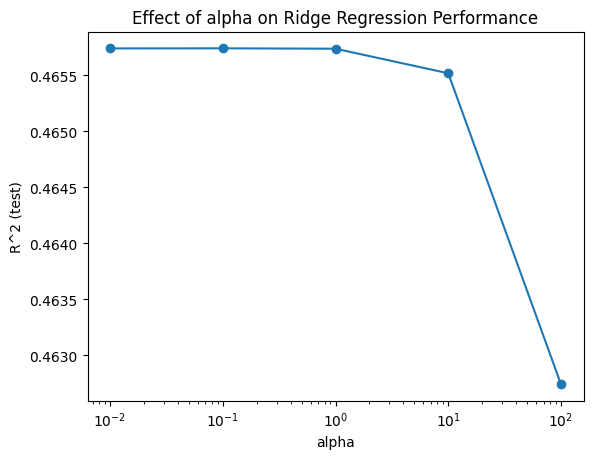

In [29]:
plt.plot(alphas, [r[1] for r in results], marker='o')
plt.xscale('log')
plt.xlabel("alpha")
plt.ylabel("R^2 (test)")
plt.title("Effect of alpha on Ridge Regression Performance")
plt.show()

In [30]:
def cont_to_class(y_cont):
    """
    takes a single datapoint (continuous) and converts it to a binary label.

    params:
        y_cont (float): A single label (continuous), between 0 and 1

    returns:
        y_class (int): A single binary label
    """

    if y_cont >= 0.2:
        y_class = 1
    else:
        y_class = 0

    return y_class
    return y_class

In [31]:
lab_func = np.vectorize(cont_to_class)
full_y_class = lab_func(full_y)

In [32]:
full_y_class

array([0, 0, 0, ..., 0, 1, 0])

In [33]:
# save the classification labels
with open("labels_class.npy", 'wb') as f:
    np.save(f, full_y_class)

In [34]:
from sklearn.linear_model import LogisticRegression
def train_logistic_model(X,y, hyperparams):
    """
    takes the training data with the hyperparameters to train the logistic model

    Params:
        X (pandas.DataFrame): DataFrame object that contains the features
        y (numpy.array): List of labels
        hyperparams (dict): a dictionary of hyperparameters where the key is the hyperparameter name,
                            and the value is the hyperparameter value

    Returns:
        log_reg_model(scikit-learn model): A trained scikit-learn model object
    """

    log_reg_model = LogisticRegression(**hyperparams)
    log_reg_model.fit(X, y)

    return log_reg_model

In [35]:
hyperparams = {
    "C": 1.0,
    "penalty": "l2",
    "solver": "lbfgs",
    "max_iter": 1000
}

temp_log_model = train_logistic_model(full_X, full_y_class, hyperparams)
temp_log_model.score(full_X, full_y_class)

0.9695185313474195

In [36]:
def accuracy(y_actual, y_predicted):
    """
    returns the evaluation metric.

    Params:
        y_actual (numpy.array): List of actual labels
        y_predicted (numpy.array): List of predicted labels

    Returns:
        metric (float): the evaluation metric
    """

    y_actual = np.array(y_actual)
    y_predicted = np.array(y_predicted)

    correct = np.sum(y_actual == y_predicted)
    accuracy = correct / len(y_actual)

    return accuracy

In [37]:
def f1_score(y_actual, y_predicted):
    """
    returns the evaluation metric.

    Params:
        y_actual (numpy.array): List of actual labels
        y_predicted (numpy.array): List of predicted labels

    Returns:
        metric (float): the evaluation metric
    """

    y_actual = np.array(y_actual)
    y_predicted = np.array(y_predicted)

    tp = np.sum((y_actual == 1) & (y_predicted == 1))
    fp = np.sum((y_actual == 0) & (y_predicted == 1))
    fn = np.sum((y_actual == 1) & (y_predicted == 0))

    # Avoid division by zero
    if tp + fp == 0:
        precision = 0
    else:
        precision = tp / (tp + fp)

    if tp + fn == 0:
        recall = 0
    else:
        recall = tp / (tp + fn)

    if precision + recall == 0:
        f1 = 0
    else:
        f1 = 2 * precision * recall / (precision + recall)

    return f1

In [38]:
def find_best_f1_threshold(y_true, y_proba, num_thresholds=200):

    thresholds = np.linspace(0.01, 0.99, num_thresholds)
    best_th = 0.5
    best_f1 = -1.0

    for th in thresholds:
        y_pred = (y_proba >= th).astype(int)
        f1 = f1_score(y_true, y_pred)  
        if f1 > best_f1:
            best_f1 = f1
            best_th = th

    return best_th, best_f1

In [39]:
import matplotlib.pyplot as plt
def evaluate_logreg_model(X,y):
    """
    Trains the most viable model using the lecture data for median engagement class prediction to evaluate it using the proposed metrics.

    Params:
        X (pandas.DataFrame): features of the dataset
        y (numpy.array): labels (binary)
    """
   # Train/test split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    # Logistic regression hyperparameters
    hyperparams = {
        "C": 1.0,
        "max_iter": 1000
    }

    # Train model
    log_reg_model = train_logistic_model(X_train, y_train, hyperparams)

    y_train_proba = log_reg_model.predict_proba(X_train)[:, 1]
    y_test_proba  = log_reg_model.predict_proba(X_test)[:, 1]

    best_th, best_train_f1 = find_best_f1_threshold(y_train, y_train_proba)

    y_train_pred = (y_train_proba >= best_th).astype(int)
    y_test_pred  = (y_test_proba  >= best_th).astype(int)


    # Compute metrics using YOUR custom functions
    train_acc = accuracy(y_train, y_train_pred)
    test_acc = accuracy(y_test, y_test_pred)

    train_f1 = f1_score(y_train, y_train_pred)
    test_f1 = f1_score(y_test, y_test_pred)

    # Print results
    print("Logistic Regression Performance:")
    print(f"Train Accuracy: {train_acc:.4f}")
    print(f"Test Accuracy : {test_acc:.4f}")
    print(f"Train F1-score: {train_f1:.4f}")
    print(f"Test F1-score : {test_f1:.4f}")

    # Overfitting detection
    print("\nOverfitting Check:")
    print(f"Accuracy Gap (train - test): {train_acc - test_acc:.4f}")
    print(f"F1 Gap (train - test): {train_f1 - test_f1:.4f}")


In [40]:
evaluate_logreg_model(full_X, full_y_class)

Logistic Regression Performance:
Train Accuracy: 0.9688
Test Accuracy : 0.9662
Train F1-score: 0.5623
Test F1-score : 0.5125

Overfitting Check:
Accuracy Gap (train - test): 0.0026
F1 Gap (train - test): 0.0498


**Your Answer Here**

I believe the model is not overfitting because its performance on the training set and the test set is very similar.

In [41]:
# If you were unable to load the initial dataset and transform the labels, 
# you can start the exercise with the alternative data provided below. But the performance will be impacted.

#full_X = pd.read_csv("features_seed.csv")
#full_y_class = np.load("labels_class_seed.npy")


#### Pipeline

#### Non-Linear model: Random Forest and HistGradientBoosting

In [42]:
def print_metrics_table(train_acc, test_acc,
                        train_f1, test_f1,
                        train_auc, test_auc,
                        train_pr_auc, test_pr_auc,
                        model_name="Model"):
    print(f"\n=== {model_name} Performance ===")
    print(f"{'Metric':<15}{'Train':>12}{'Test':>12}")
    print("-" * 40)
    print(f"{'Accuracy':<15}{train_acc:>12.4f}{test_acc:>12.4f}")
    print(f"{'F1-score':<15}{train_f1:>12.4f}{test_f1:>12.4f}")
    print(f"{'ROC-AUC':<15}{train_auc:>12.4f}{test_auc:>12.4f}")
    print(f"{'PR-AUC':<15}{train_pr_auc:>12.4f}{test_pr_auc:>12.4f}")
    print("-" * 40)
    
    print("\nOverfitting Check:")
    print(f"{'Accuracy gap (train-test)':<28}: {train_acc - test_acc:.4f}")
    print(f"{'F1 gap (train-test)':<28}: {train_f1 - test_f1:.4f}")
    print(f"{'AUC gap (train-test)':<28}: {train_auc - test_auc:.4f}")
    print(f"{'PR-AUC gap (train-test)':<28}: {train_pr_auc - test_pr_auc:.4f}")

In [43]:
# Your Code Here
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, roc_curve, average_precision_score,precision_recall_curve, average_precision_score

def train_rf_model(X, y, hyperparams):
    rf_model = RandomForestClassifier(**hyperparams)
    rf_model.fit(X, y)
    return rf_model 

In [44]:

def evaluate_rf_model(X, y):
    # train/test split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    # hyperparams
    rf_hyperparams = {
        "n_estimators": 200,      
        "max_depth": 8,           
        "min_samples_split": 20, 
        "min_samples_leaf": 8,   
        "max_features": 0.4,
        "bootstrap": True,
        "class_weight": "balanced", 
        "random_state": 42,
        "n_jobs": -1
    }
    # train model
    rf_model = train_rf_model(X_train, y_train, rf_hyperparams)

    # prediction
    y_train_proba = rf_model.predict_proba(X_train)[:, 1]
    y_test_proba  = rf_model.predict_proba(X_test)[:, 1]

    best_th, best_train_f1 = find_best_f1_threshold(y_train, y_train_proba)

    y_train_pred = (y_train_proba >= best_th).astype(int)
    y_test_pred  = (y_test_proba  >= best_th).astype(int)

    # caculate Accuracy / F1
    train_acc = accuracy(y_train, y_train_pred)
    test_acc  = accuracy(y_test, y_test_pred)

    train_f1 = f1_score(y_train, y_train_pred)
    test_f1  = f1_score(y_test, y_test_pred)

    # caculate ROC-AUC
    train_auc = roc_auc_score(y_train, y_train_proba)
    test_auc  = roc_auc_score(y_test, y_test_proba)

    # PR-AUC score
    train_pr_auc = average_precision_score(y_train, y_train_proba)
    test_pr_auc  = average_precision_score(y_test, y_test_proba)

    # results
    print_metrics_table(
        train_acc, test_acc,
        train_f1, test_f1,
        train_auc, test_auc,
        train_pr_auc, test_pr_auc,
        model_name="Random Forest"
    )

    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    # ROC Curve
    fpr, tpr, thresholds = roc_curve(y_test, y_test_proba)
    axes[0].plot(fpr, tpr, label=f"Random Forest (AUC = {test_auc:.3f})")
    axes[0].plot([0, 1], [0, 1], linestyle="--", label="Random guess")
    axes[0].set_xlabel("False Positive Rate")
    axes[0].set_ylabel("True Positive Rate")
    axes[0].set_title("ROC Curve")
    axes[0].legend()
    axes[0].grid(alpha=0.3)
    
    # PR Curve
    precision, recall, thresholds = precision_recall_curve(y_test, y_test_proba)
    axes[1].plot(recall, precision, label=f"PR Curve (AUC = {test_pr_auc:.3f})")
    axes[1].set_xlabel("Recall")
    axes[1].set_ylabel("Precision")
    axes[1].set_title("Precision-Recall Curve")
    axes[1].legend()
    axes[1].grid(alpha=0.3)

    plt.tight_layout()
    plt.show()


=== Random Forest Performance ===
Metric                Train        Test
----------------------------------------
Accuracy             0.9746      0.9658
F1-score             0.6768      0.5212
ROC-AUC              0.9849      0.9281
PR-AUC               0.7514      0.5131
----------------------------------------

Overfitting Check:
Accuracy gap (train-test)   : 0.0088
F1 gap (train-test)         : 0.1555
AUC gap (train-test)        : 0.0568
PR-AUC gap (train-test)     : 0.2382


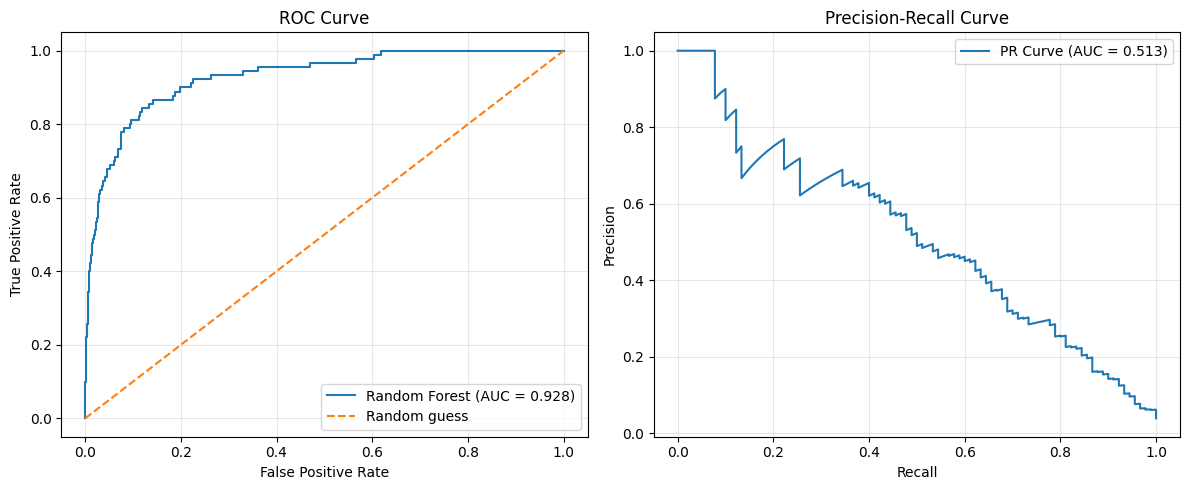

In [45]:
evaluate_rf_model(full_X, full_y_class)

In [46]:
from sklearn.ensemble import HistGradientBoostingClassifier
def train_gb_model(X, y, hyperparams):
    gb_model = HistGradientBoostingClassifier(**hyperparams)
    gb_model.fit(X, y)
    return gb_model

In [47]:
def evaluate_gb_model(X, y):
    # train / test split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    # hyperparams
    gb_hyperparams = {
        "max_depth": 4,
        "learning_rate": 0.04,     
        "max_iter": 200,           
        "min_samples_leaf": 30,    
        "l2_regularization": 2.0, 
        "class_weight": "balanced",
        "random_state": 42
    }
    # train model
    gb_model = train_gb_model(X_train, y_train, gb_hyperparams)

    y_train_proba = gb_model.predict_proba(X_train)[:, 1]
    y_test_proba  = gb_model.predict_proba(X_test)[:, 1]

    best_th, best_train_f1 = find_best_f1_threshold(y_train, y_train_proba)

    y_train_pred = (y_train_proba >= best_th).astype(int)
    y_test_pred  = (y_test_proba  >= best_th).astype(int)

    # Accuracy / F1
    train_acc = accuracy(y_train, y_train_pred)
    test_acc  = accuracy(y_test, y_test_pred)

    train_f1 = f1_score(y_train, y_train_pred)
    test_f1  = f1_score(y_test, y_test_pred)

    # ROC-AUC
    train_auc = roc_auc_score(y_train, y_train_proba)
    test_auc  = roc_auc_score(y_test, y_test_proba)

    # PR-AUC score
    train_pr_auc = average_precision_score(y_train, y_train_proba)
    test_pr_auc  = average_precision_score(y_test, y_test_proba)

    # Results
    print_metrics_table(
        train_acc, test_acc,
        train_f1, test_f1,
        train_auc, test_auc,
        train_pr_auc, test_pr_auc,
        model_name="HistGradientBoosting"
    )
    
    #plot
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    # ROC Curve
    fpr, tpr, thresholds = roc_curve(y_test, y_test_proba)
    axes[0].plot(fpr, tpr, label=f"HGB (AUC = {test_auc:.3f})")
    axes[0].plot([0, 1], [0, 1], linestyle="--", label="Random guess")
    axes[0].set_xlabel("False Positive Rate")
    axes[0].set_ylabel("True Positive Rate")
    axes[0].set_title("ROC Curve - HistGradientBoosting")
    axes[0].legend()
    axes[0].grid(alpha=0.3)

    # PR Curve
    precision, recall, thresholds = precision_recall_curve(y_test, y_test_proba)
    axes[1].plot(recall, precision, label=f"PR Curve (AUC = {test_pr_auc:.3f})")
    axes[1].set_xlabel("Recall")
    axes[1].set_ylabel("Precision")
    axes[1].set_title("Precision-Recall Curve - HistGradientBoosting")
    axes[1].legend()
    axes[1].grid(alpha=0.3)

    plt.tight_layout()
    plt.show()


=== HistGradientBoosting Performance ===
Metric                Train        Test
----------------------------------------
Accuracy             0.9748      0.9606
F1-score             0.6970      0.4972
ROC-AUC              0.9862      0.9274
PR-AUC               0.7641      0.4752
----------------------------------------

Overfitting Check:
Accuracy gap (train-test)   : 0.0142
F1 gap (train-test)         : 0.1998
AUC gap (train-test)        : 0.0589
PR-AUC gap (train-test)     : 0.2889


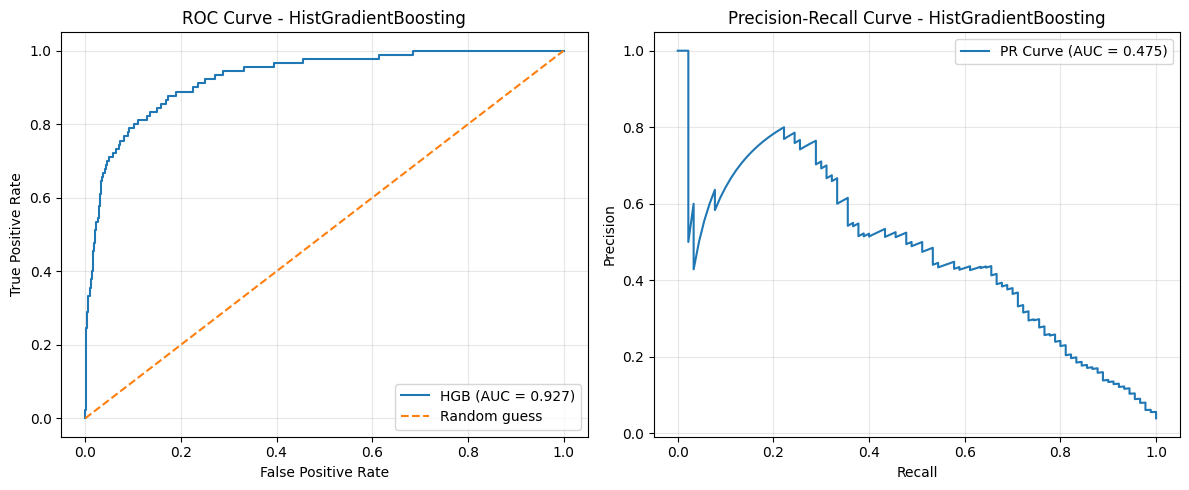

In [48]:
evaluate_gb_model(full_X, full_y_class)

##### Play new evaluation of logistc model
Because the previous logistic model's evaluation metrics did not include ROC_AUC and PR_AUC,so write a evaluate_logreg_model_new

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, average_precision_score, roc_curve, precision_recall_curve
import matplotlib.pyplot as plt

def evaluate_logreg_model_new(X, y):
    # train / test split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )

    # hyperparameters
    hyperparams = {
        "C": 1.0,
        "penalty": "l2",
        "solver": "lbfgs",
        "max_iter": 1000
    }

    # 3. train
    log_reg_model = train_logistic_model(X_train, y_train, hyperparams)

    y_train_proba = log_reg_model.predict_proba(X_train)[:, 1]
    y_test_proba  = log_reg_model.predict_proba(X_test)[:, 1]

    best_th, best_train_f1 = find_best_f1_threshold(y_train, y_train_proba)

    y_train_pred = (y_train_proba >= best_th).astype(int)
    y_test_pred  = (y_test_proba  >= best_th).astype(int)

    # Accuracy / F1
    train_acc = accuracy(y_train, y_train_pred)
    test_acc  = accuracy(y_test,  y_test_pred)

    train_f1 = f1_score(y_train, y_train_pred)
    test_f1  = f1_score(y_test,  y_test_pred)

    # 7. ROC-AUC & PR-AUC
    train_auc    = roc_auc_score(y_train, y_train_proba)
    test_auc     = roc_auc_score(y_test,  y_test_proba)
    train_pr_auc = average_precision_score(y_train, y_train_proba)
    test_pr_auc  = average_precision_score(y_test,  y_test_proba)

    # print
    print_metrics_table(
        train_acc, test_acc,
        train_f1,  test_f1,
        train_auc, test_auc,
        train_pr_auc, test_pr_auc,
        model_name="Logistic Regression"
    )

    # 9. virtualization
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    # --- ROC Curve ---
    fpr, tpr, _ = roc_curve(y_test, y_test_proba)
    axes[0].plot(fpr, tpr, label=f"LogReg (AUC = {test_auc:.3f})")
    axes[0].plot([0, 1], [0, 1], linestyle="--", label="Random guess")
    axes[0].set_xlabel("False Positive Rate")
    axes[0].set_ylabel("True Positive Rate")
    axes[0].set_title("ROC Curve - Logistic Regression")
    axes[0].legend()
    axes[0].grid(alpha=0.3)

    # --- PR Curve ---
    precision, recall, _ = precision_recall_curve(y_test, y_test_proba)
    axes[1].plot(recall, precision, label=f"PR Curve (AUC = {test_pr_auc:.3f})")
    axes[1].set_xlabel("Recall")
    axes[1].set_ylabel("Precision")
    axes[1].set_title("Precision-Recall Curve - Logistic Regression")
    axes[1].legend()
    axes[1].grid(alpha=0.3)

    plt.tight_layout()
    plt.show()

    return log_reg_model


=== Logistic Regression Performance ===
Metric                Train        Test
----------------------------------------
Accuracy             0.9634      0.9584
F1-score             0.5564      0.5429
ROC-AUC              0.9185      0.9248
PR-AUC               0.5806      0.5449
----------------------------------------

Overfitting Check:
Accuracy gap (train-test)   : 0.0050
F1 gap (train-test)         : 0.0136
AUC gap (train-test)        : -0.0062
PR-AUC gap (train-test)     : 0.0357


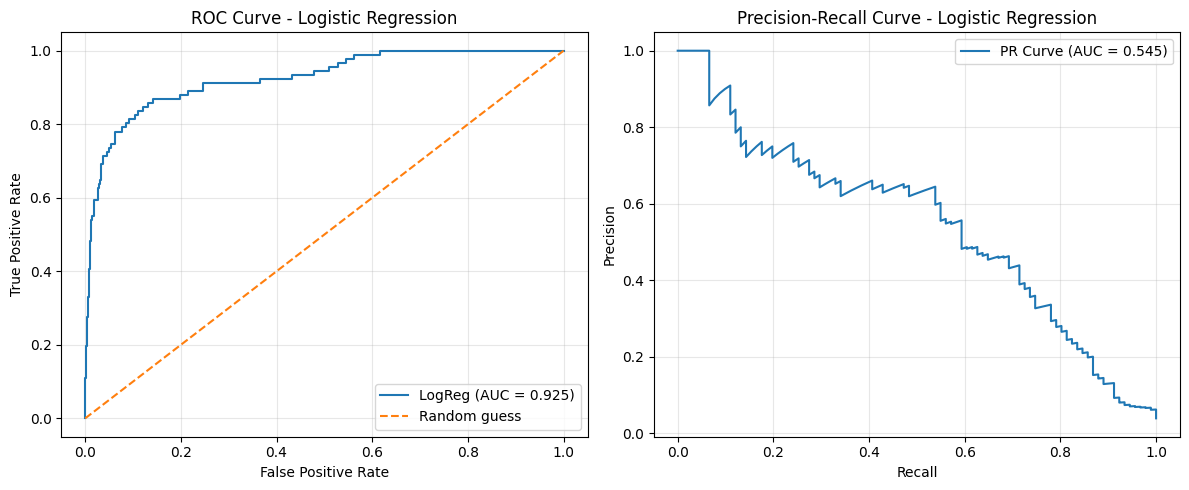

In [50]:
logreg_model = evaluate_logreg_model_new(full_X, full_y_class)

##### Performance Before Feature Engineering

| Model | Train Accuracy | Test Accuracy | Train F1 | Test F1 | Train PR-AUC | Test PR-AUC |
|-------|----------------|---------------|----------|---------|---------------|--------------|
| Logistic Regression | 0.9634 | 0.9584 | 0.5564 | 0.5429 | 0.5806 | 0.5449 |
| Random Forest | 0.9746 | 0.9658 | 0.6768 | 0.5212 | 0.7514 | 0.5131 |
| HistGradientBoosting | 0.9748 | 0.9606 | 0.6970 | 0.4972 | 0.7641 | 0.4752 |

#### Aggregated Feature engineering 

In [51]:
import numpy as np

def add_aggregated_features_raw(dataset):
    df = dataset.copy()
   
    df["lexical_complexity"] = df["document_entropy"] * (1.0 - df["fraction_stopword_coverage"])
    
    df["stopword_density_gap"] = df["fraction_stopword_presence"] - df["fraction_stopword_coverage"]
    
    eps = 1e-3  
    df["speaking_intensity_log"] = np.log1p(df["word_count"] / (df["duration"] + eps))
    
    df["fast_but_choppy"] = df["speaker_speed"] * df["silent_period_rate"]

    df["title_body_ratio"] = df["title_word_count"] / (np.log1p(df["word_count"]) + eps)
    df["coverage_per_min"] = df["topic_coverage"] / (df["duration"] + eps)

    difficulty = (100.0 - df["easiness"])
    df["hard_complex_content"] = difficulty * df["document_entropy"]

    dur_q75 = df["duration"].quantile(0.75)
    df["is_long_video"] = (df["duration"] >= dur_q75).astype(int)

    speed_q75 = df["speaker_speed"].quantile(0.75)
    df["is_fast_speaker"] = (df["speaker_speed"] >= speed_q75).astype(int)

    return df

In [52]:
lectures_aug = add_aggregated_features_raw(lectures)
preprocessed_lectures_aug = preprocess_lecture_dataset(lectures_aug)

preprocessed_lectures_aug, full_X_aug, full_y_aug_reg = prepare_final_dataset(preprocessed_lectures_aug)

threshold_logit = np.log((0.2 + 1e-6)/(1 - 0.2 + 1e-6))
full_y_aug = (full_y_aug_reg >= threshold_logit).astype(int)


=== Random Forest Performance ===
Metric                Train        Test
----------------------------------------
Accuracy             0.9343      0.9013
F1-score             0.7766      0.6752
ROC-AUC              0.9654      0.9036
PR-AUC               0.8722      0.7528
----------------------------------------

Overfitting Check:
Accuracy gap (train-test)   : 0.0330
F1 gap (train-test)         : 0.1014
AUC gap (train-test)        : 0.0618
PR-AUC gap (train-test)     : 0.1194


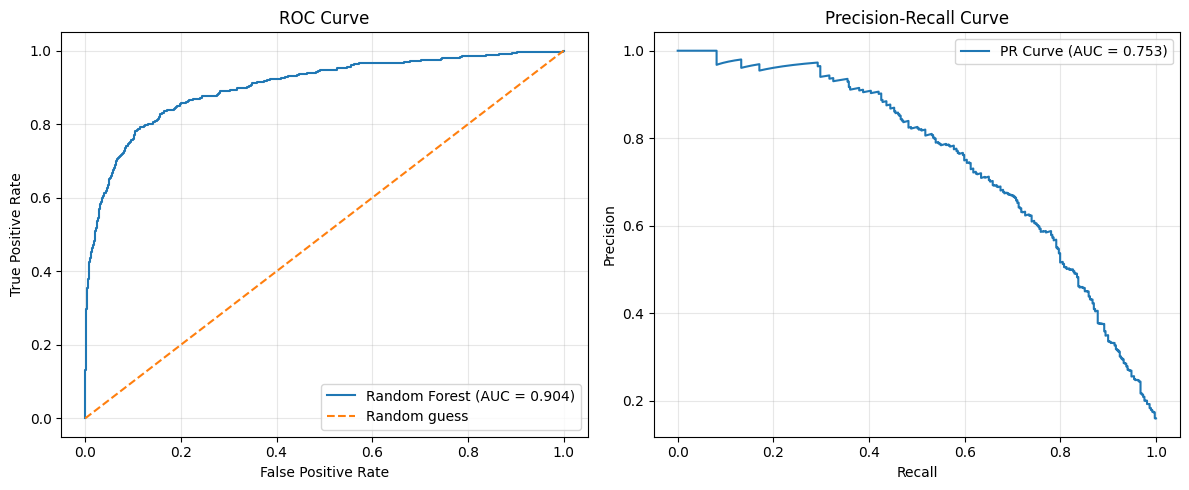


=== HistGradientBoosting Performance ===
Metric                Train        Test
----------------------------------------
Accuracy             0.9269      0.8996
F1-score             0.7494      0.6676
ROC-AUC              0.9550      0.9058
PR-AUC               0.8463      0.7570
----------------------------------------

Overfitting Check:
Accuracy gap (train-test)   : 0.0274
F1 gap (train-test)         : 0.0817
AUC gap (train-test)        : 0.0493
PR-AUC gap (train-test)     : 0.0894


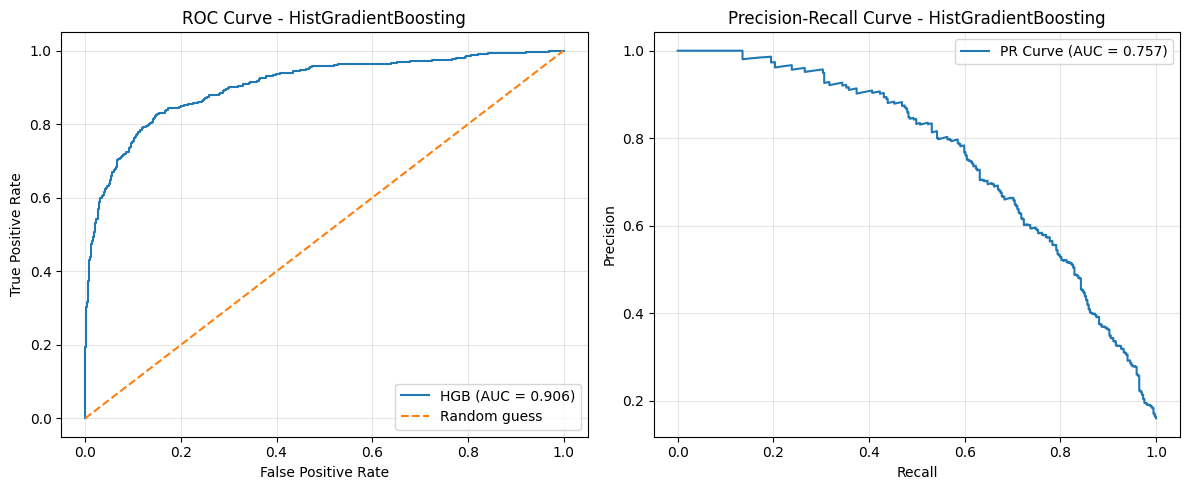


=== Logistic Regression Performance ===
Metric                Train        Test
----------------------------------------
Accuracy             0.9048      0.9065
F1-score             0.6932      0.6983
ROC-AUC              0.9052      0.9036
PR-AUC               0.7669      0.7668
----------------------------------------

Overfitting Check:
Accuracy gap (train-test)   : -0.0016
F1 gap (train-test)         : -0.0051
AUC gap (train-test)        : 0.0016
PR-AUC gap (train-test)     : 0.0000


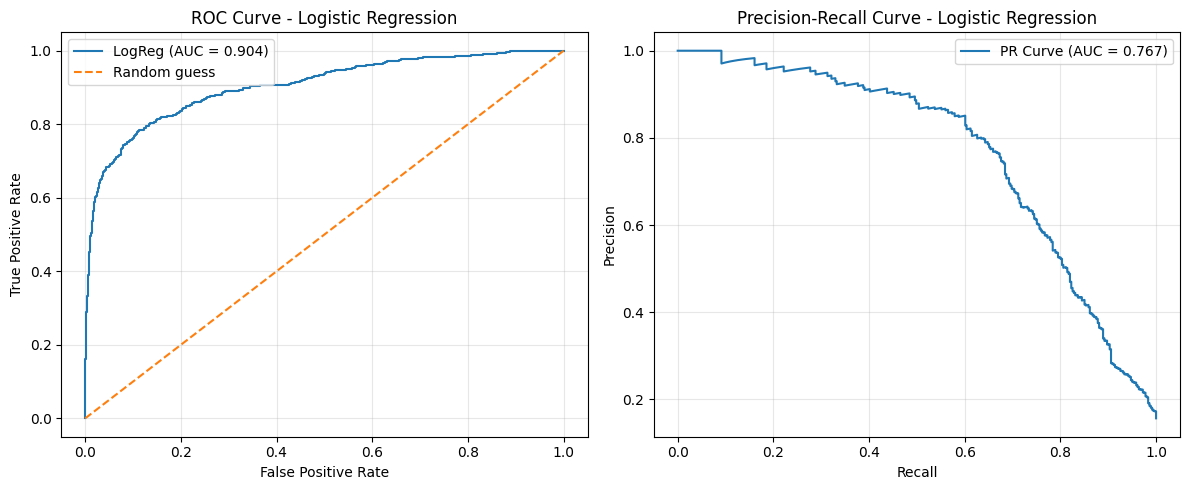

In [53]:
# result after adding aggregated_features
evaluate_rf_model(full_X_aug, full_y_aug)
evaluate_gb_model(full_X_aug, full_y_aug)
logreg_model = evaluate_logreg_model_new(full_X_aug, full_y_aug)

##### Performance After Feature Engineering

| Model | Train Accuracy | Test Accuracy | Train F1 | Test F1 | Train PR-AUC | Test PR-AUC |
|-------|----------------|---------------|----------|---------|---------------|--------------|
| Logistic Regression | 0.9129 | 0.9182 | 0.6602 | 0.6866 | 0.7669 | 0.7668 |
| Random Forest | 0.9343 | 0.9013 | 0.7766 | 0.6752 | 0.8722 | 0.7528 |
| HistGradientBoosting | 0.9269 | 0.8996 | 0.7494 | 0.6676 | 0.8463 | 0.7570 |

In [54]:
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier, StackingClassifier

In [55]:
def evaluate_stacking_model(X, y):
    # train / test split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    # base models
    base_logreg = LogisticRegression(
        C=1.0,
        penalty="l2",
        solver="lbfgs",
        max_iter=1000
    )

    base_rf = RandomForestClassifier(
        n_estimators=200,
        max_depth=8,
        min_samples_split=20,
        min_samples_leaf=10,
        max_features="sqrt",
        bootstrap=True,
        class_weight="balanced",
        random_state=42,
        n_jobs=-1
    )

    base_hgb = HistGradientBoostingClassifier(
        learning_rate=0.1,
        max_depth=8,
        max_leaf_nodes=31,
        min_samples_leaf=20,
        l2_regularization=0.0,
        random_state=42
    )

    estimators = [
        ("logreg", base_logreg),
        ("rf", base_rf),
        ("hgb", base_hgb),
    ]

    # meta-learner
    final_logreg = LogisticRegression(
        C=1.0,
        penalty="l2",
        solver="lbfgs",
        max_iter=1000
    )

    stacking_model = StackingClassifier(
        estimators=estimators,
        final_estimator=final_logreg,
        passthrough=False,   
        n_jobs=-1
    )

    # train
    stacking_model.fit(X_train, y_train)

    y_train_proba = stacking_model.predict_proba(X_train)[:, 1]
    y_test_proba  = stacking_model.predict_proba(X_test)[:, 1]

    best_th, best_train_f1 = find_best_f1_threshold(y_train, y_train_proba)

    y_train_pred = (y_train_proba >= best_th).astype(int)
    y_test_pred  = (y_test_proba  >= best_th).astype(int)

    # indicators
    train_acc = accuracy(y_train, y_train_pred)
    test_acc  = accuracy(y_test, y_test_pred)

    train_f1 = f1_score(y_train, y_train_pred)
    test_f1  = f1_score(y_test, y_test_pred)

    train_auc = roc_auc_score(y_train, y_train_proba)
    test_auc  = roc_auc_score(y_test, y_test_proba)

    train_pr_auc = average_precision_score(y_train, y_train_proba)
    test_pr_auc  = average_precision_score(y_test, y_test_proba)

    # print
    print("=== Stacking Ensemble Performance ===")
    print("Metric          Train        Test")
    print("---------------------------------------")
    print(f"Accuracy     {train_acc:10.4f}  {test_acc:8.4f}")
    print(f"F1-score     {train_f1:10.4f}  {test_f1:8.4f}")
    print(f"ROC-AUC      {train_auc:10.4f}  {test_auc:8.4f}")
    print(f"PR-AUC       {train_pr_auc:10.4f}  {test_pr_auc:8.4f}")
    print("---------------------------------------\n")

    # Overfitting check
    print("Overfitting Check:")
    print(f"Accuracy gap (train - test): {train_acc - test_acc: .4f}")
    print(f"F1 gap (train - test)      : {train_f1 - test_f1: .4f}")
    print(f"AUC gap (train - test)     : {train_auc - test_auc: .4f}")
    print(f"PR-AUC gap (train - test)  : {train_pr_auc - test_pr_auc: .4f}")

    # virtualization
    fpr, tpr, _ = roc_curve(y_test, y_test_proba)
    precision, recall, _ = precision_recall_curve(y_test, y_test_proba)

    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    # ROC
    axes[0].plot(fpr, tpr, label=f"Stacking (AUC = {test_auc:.3f})")
    axes[0].plot([0, 1], [0, 1], linestyle="--", label="Random guess")
    axes[0].set_xlabel("False Positive Rate")
    axes[0].set_ylabel("True Positive Rate")
    axes[0].set_title("ROC Curve - Stacking Ensemble")
    axes[0].legend()
    axes[0].grid(alpha=0.3)

    # PR
    axes[1].plot(recall, precision, label=f"PR Curve (AUC = {test_pr_auc:.3f})")
    axes[1].set_xlabel("Recall")
    axes[1].set_ylabel("Precision")
    axes[1].set_title("Precision-Recall Curve - Stacking Ensemble")
    axes[1].legend()
    axes[1].grid(alpha=0.3)

    plt.tight_layout()
    plt.show()

    return stacking_model

=== Stacking Ensemble Performance ===
Metric          Train        Test
---------------------------------------
Accuracy         0.9352    0.9069
F1-score         0.7803    0.6889
ROC-AUC          0.9670    0.9039
PR-AUC           0.8763    0.7619
---------------------------------------

Overfitting Check:
Accuracy gap (train - test):  0.0282
F1 gap (train - test)      :  0.0915
AUC gap (train - test)     :  0.0630
PR-AUC gap (train - test)  :  0.1144


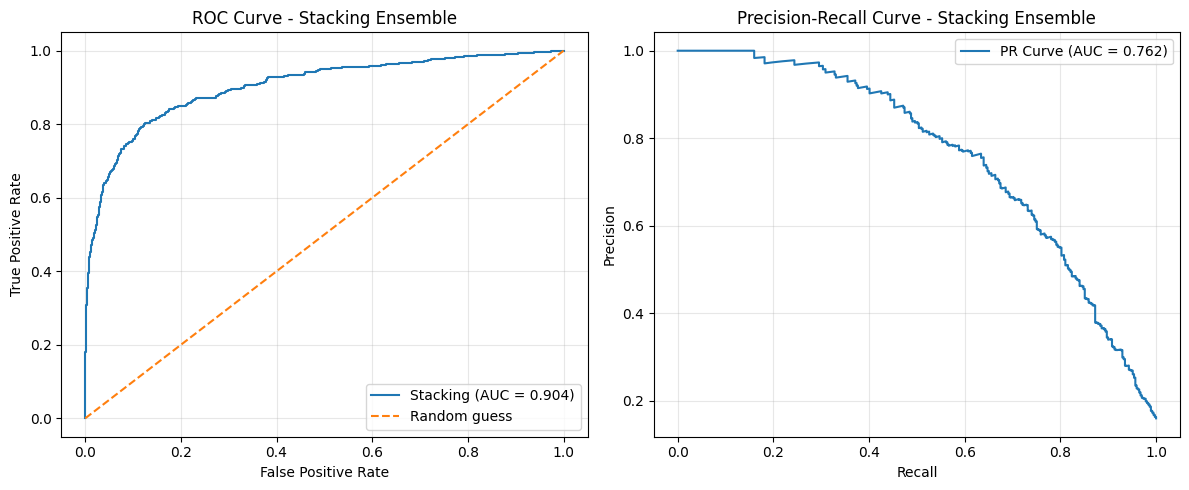

Exception ignored in: <function ResourceTracker.__del__ at 0x104177240>
Traceback (most recent call last):
  File "/opt/anaconda3/envs/foundofAI/lib/python3.13/multiprocessing/resource_tracker.py", line 84, in __del__
  File "/opt/anaconda3/envs/foundofAI/lib/python3.13/multiprocessing/resource_tracker.py", line 93, in _stop
  File "/opt/anaconda3/envs/foundofAI/lib/python3.13/multiprocessing/resource_tracker.py", line 118, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x104fdb240>
Traceback (most recent call last):
  File "/opt/anaconda3/envs/foundofAI/lib/python3.13/multiprocessing/resource_tracker.py", line 84, in __del__
  File "/opt/anaconda3/envs/foundofAI/lib/python3.13/multiprocessing/resource_tracker.py", line 93, in _stop
  File "/opt/anaconda3/envs/foundofAI/lib/python3.13/multiprocessing/resource_tracker.py", line 118, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception igno

In [56]:
stack_model = evaluate_stacking_model(full_X_aug, full_y_aug)

#### Parameters settings

## CV Alignment: 5-Fold CV, Model Comparison, and Stacking Ensemble

This section aligns with the CV: **linear vs tree-based models**, **stacking**, and **ROC-AUC/PR-AUC/F1**.


In [ ]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score, average_precision_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier

# X, y should be prepared from the lectures dataset

base_models = [
    ('lr', LogisticRegression(max_iter=2000)),
    ('rf', RandomForestClassifier(n_estimators=300, random_state=42)),
    ('gb', GradientBoostingClassifier(random_state=42)),
]
stack_model = StackingClassifier(
    estimators=base_models,
    final_estimator=LogisticRegression(max_iter=2000),
    passthrough=True
)

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
results = []

for fold, (train_idx, val_idx) in enumerate(skf.split(X, y), 1):
    X_train, X_val = X[train_idx], X[val_idx]
    y_train, y_val = y[train_idx], y[val_idx]

    stack_model.fit(X_train, y_train)
    probs = stack_model.predict_proba(X_val)[:, 1]
    preds = (probs >= 0.5).astype(int)

    results.append({
        'fold': fold,
        'roc_auc': roc_auc_score(y_val, probs),
        'pr_auc': average_precision_score(y_val, probs),
        'f1': f1_score(y_val, preds)
    })

# print(results)
